In [1]:
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}\nMatplotlib {mpl.__version__}\n" ) 

Python 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
Pandas 1.5.0
NumPy 1.23.5
Matplotlib 3.5.2



<h3>STEP 1</h3> 

- Clean DATA
- EDA
- Create Customer single view ( before clustering )

In [2]:
df = pd.read_csv('supermarket.csv')
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200734,20071019,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,200805,20080328,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,NaN,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200716,20070612,3,9,1,0.86,PRD0900963,CL00248,DEP00089,G00030,...,NaN,NaN,994106200026009,S,MM,Small Shop,Grocery,STORE00001,LS,E02
3,200815,20080604,4,10,3,0.90,PRD0901055,CL00248,DEP00089,G00030,...,NaN,NaN,994111300076346,L,MM,Top Up,Grocery,STORE00001,LS,E02
4,200626,20060824,5,16,1,1.77,PRD0901877,CL00169,DEP00056,G00017,...,NaN,NaN,994102000065854,L,LA,Top Up,Fresh,STORE00001,LS,E02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578082 entries, 0 to 578081
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 578082 non-null  int64  
 1   SHOP_DATE                 578082 non-null  int64  
 2   SHOP_WEEKDAY              578082 non-null  int64  
 3   SHOP_HOUR                 578082 non-null  int64  
 4   QUANTITY                  578082 non-null  int64  
 5   SPEND                     578082 non-null  float64
 6   PROD_CODE                 578082 non-null  object 
 7   PROD_CODE_10              578082 non-null  object 
 8   PROD_CODE_20              578082 non-null  object 
 9   PROD_CODE_30              578082 non-null  object 
 10  PROD_CODE_40              578082 non-null  object 
 11  CUST_CODE                 492494 non-null  object 
 12  CUST_PRICE_SENSITIVITY    492494 non-null  object 
 13  CUST_LIFESTAGE            433142 non-null  o

- Clean DATA

In [4]:
def week(x):
    x = str(x)[:4]+'-'+str(x)[4:]
    return x

df['SHOP_DATE'] = pd.to_datetime(df['SHOP_DATE'], format='%Y%m%d')
df['SHOP_WEEK'] = df['SHOP_WEEK'].apply(week)

# Fill NaN

filnanfordf = ['CUST_CODE','CUST_PRICE_SENSITIVITY','CUST_LIFESTAGE']

for x in filnanfordf :
    df[x] = df[x].fillna('XX')

df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,2007-34,2007-10-19,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,2008-05,2008-03-28,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,XX,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
2,2007-16,2007-06-12,3,9,1,0.86,PRD0900963,CL00248,DEP00089,G00030,...,XX,XX,994106200026009,S,MM,Small Shop,Grocery,STORE00001,LS,E02
3,2008-15,2008-06-04,4,10,3,0.90,PRD0901055,CL00248,DEP00089,G00030,...,XX,XX,994111300076346,L,MM,Top Up,Grocery,STORE00001,LS,E02
4,2006-26,2006-08-24,5,16,1,1.77,PRD0901877,CL00169,DEP00056,G00017,...,XX,XX,994102000065854,L,LA,Top Up,Fresh,STORE00001,LS,E02


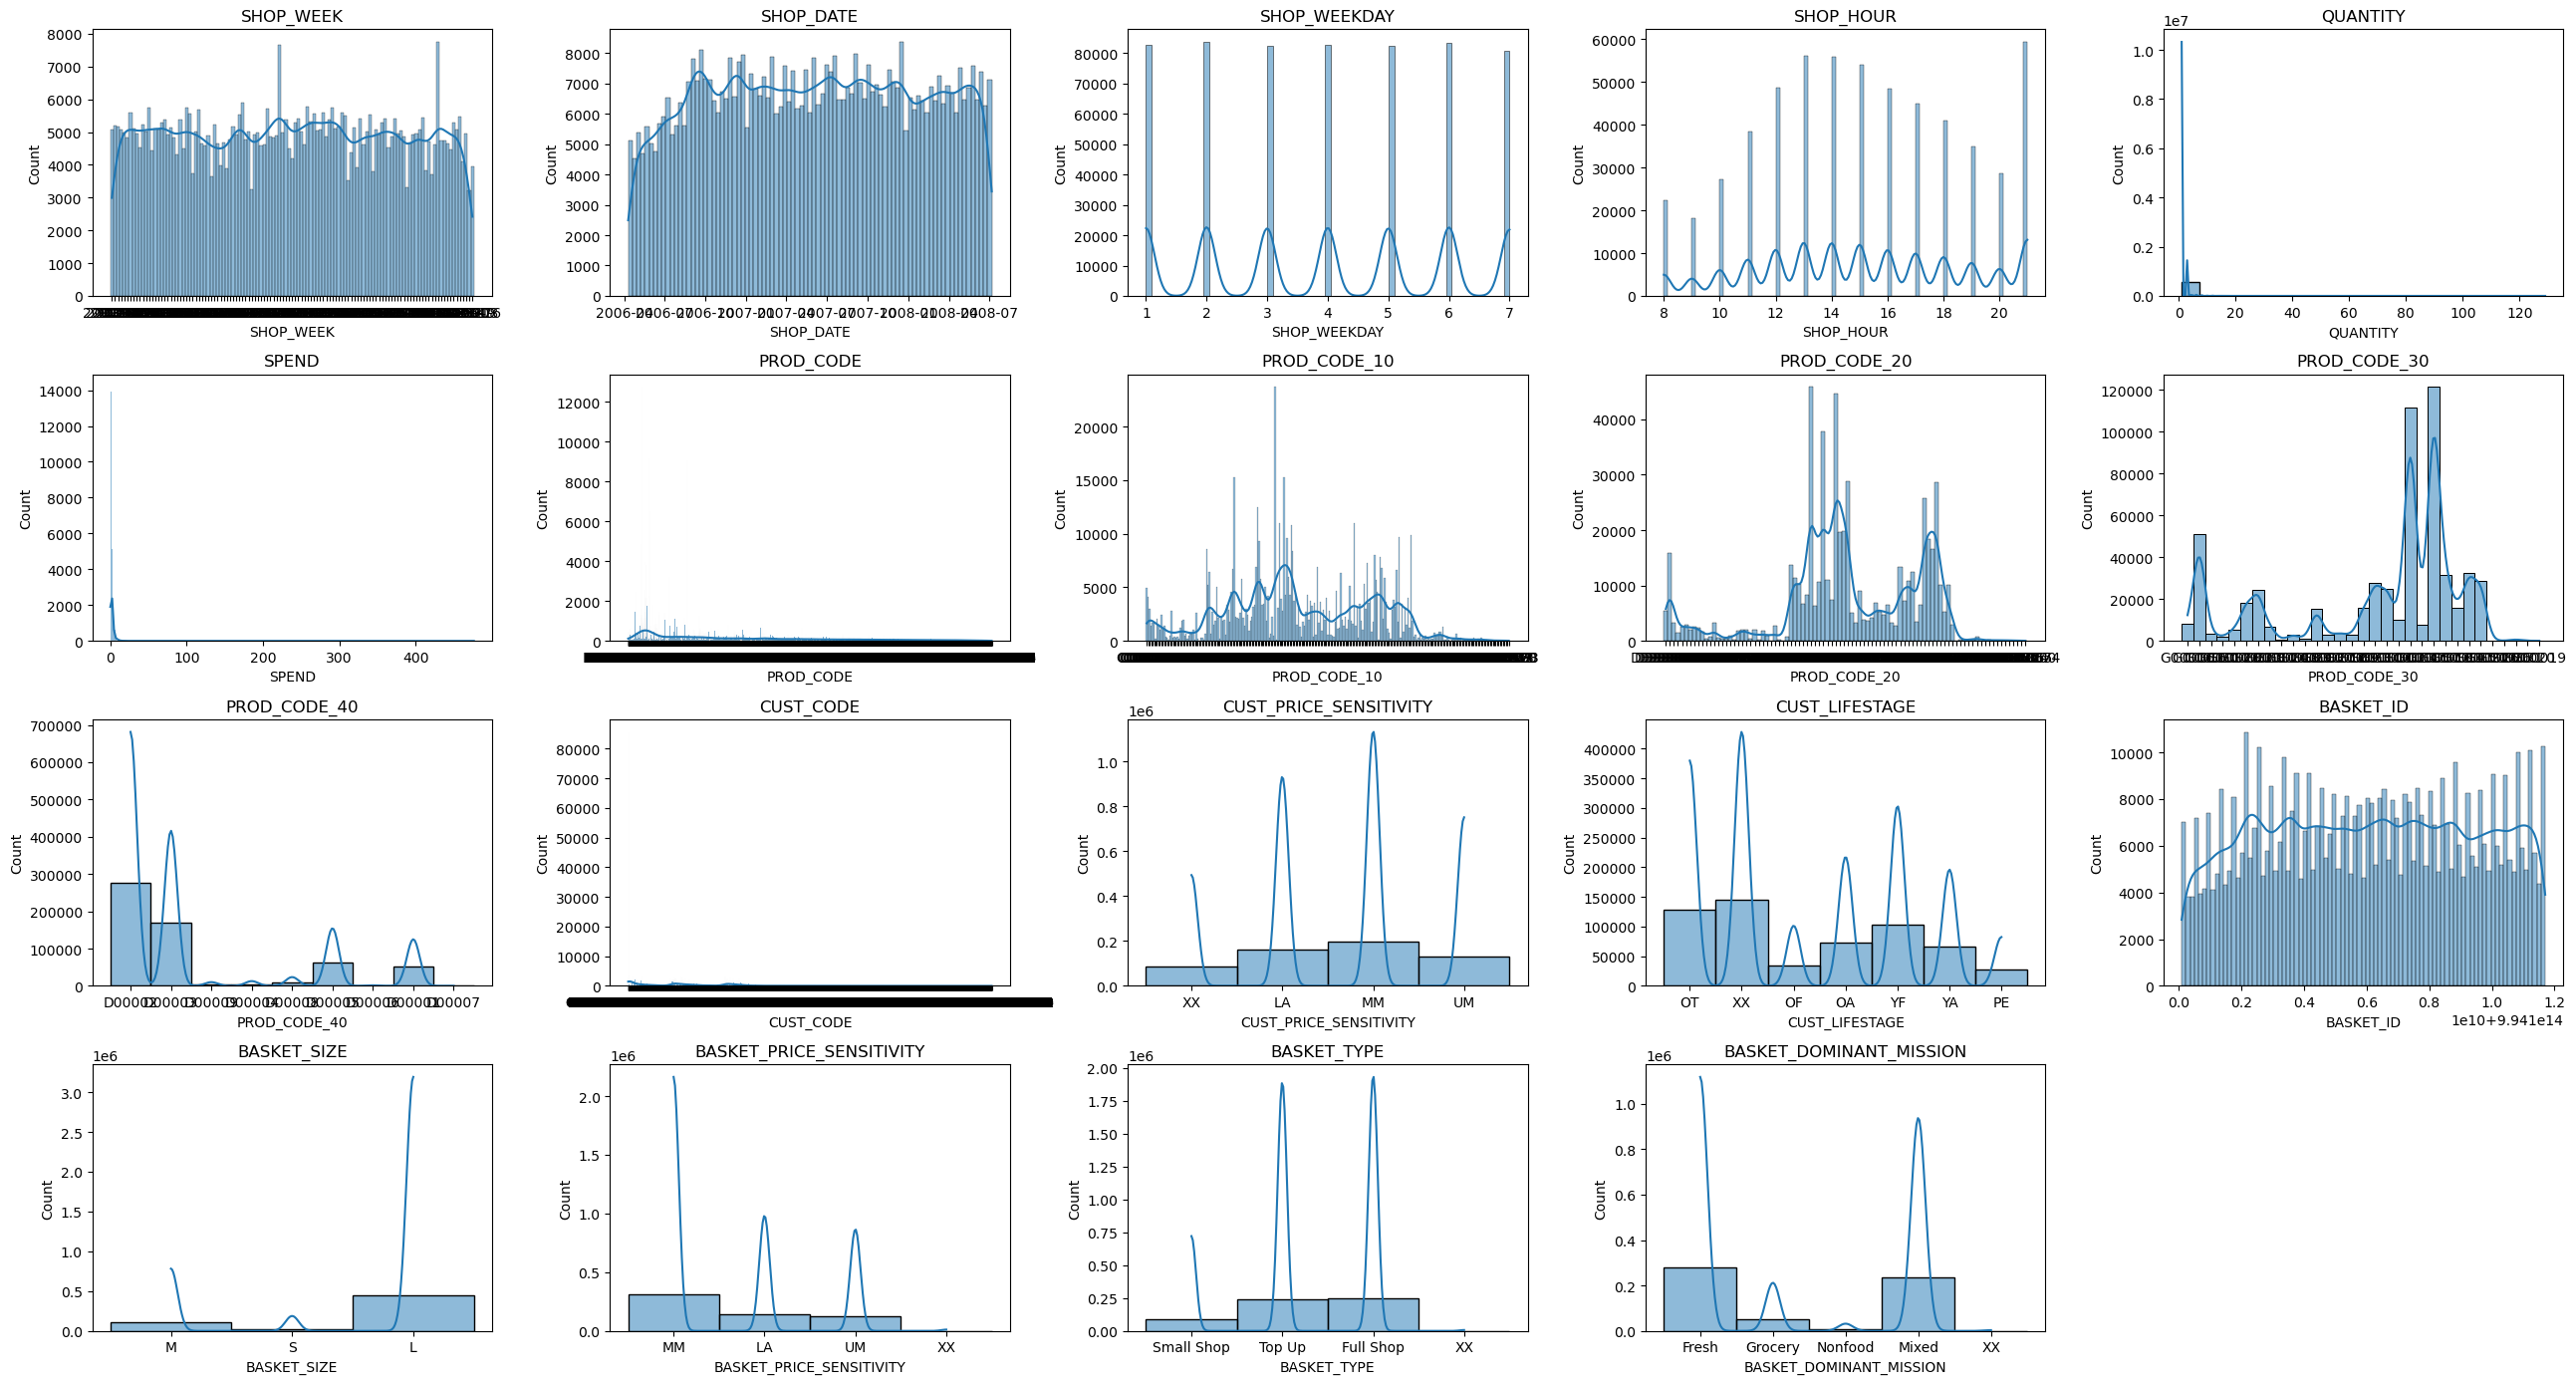

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(26,14) )

for i,ax in enumerate(axes.flat):
    if i < 19:
        g = sns.histplot(data=df, x=df.columns[i], kde=True, ax = ax)
        g.set_title(df.columns[i])
    else :
        fig.delaxes(ax)
    
# fig.suptitle("Overall")
fig.tight_layout()
plt.show()

In [6]:
# add column

df['total_sales'] = df['SPEND']*df['QUANTITY']


<h4>Create customer single view table</h4>

In [7]:
## Create an important features to perform customer single view ##

# import datetime as dt

newdf = pd.DataFrame( df['CUST_CODE'].unique() ).rename(columns={0:'cust_id'})

totalspend = pd.DataFrame(df.groupby(by=['CUST_CODE'],group_keys=True)
                          .apply( lambda x: sum(x['total_sales']) )
                          ).rename(columns={0:'total_spend'})

tm = pd.DataFrame(df.groupby(by=['CUST_CODE', 
                                 pd.Grouper(key='SHOP_DATE', freq='3M')])['total_sales']
                                 .agg('sum')
                  ).groupby('CUST_CODE').agg('mean').rename(columns={'total_sales':'total_av_3m'})

sm = pd.DataFrame(df.groupby(by=['CUST_CODE', 
                                 pd.Grouper(key='SHOP_DATE', freq='6M')])['total_sales']
                                 .agg('sum')
                  ).groupby('CUST_CODE').agg('mean').rename(columns={'total_sales':'total_av_6m'})

yearly = pd.DataFrame( df.groupby(by=['CUST_CODE', 
                                      pd.Grouper(key='SHOP_DATE', freq='Y')])['total_sales']
                                      .agg('sum')
                  ).groupby('CUST_CODE').agg('mean').rename(columns={'total_sales':'total_av_12m'})

qty_yearly = pd.DataFrame( df.groupby(by=['CUST_CODE', 
                                      pd.Grouper(key='SHOP_DATE', freq='Y')])['QUANTITY']
                                      .agg('sum')
                  ).groupby('CUST_CODE').agg('mean').rename(columns={'QUANTITY':'qty_av_12m'})

sku = pd.DataFrame(df.groupby(by=['CUST_CODE'])
                   .apply( 
                       lambda x : round( (len(x['PROD_CODE'].unique())/(df['PROD_CODE'].nunique()))*100
                                        , 2 )
                       )
                            ).rename(columns={0:'sku_penetrate(%)'})

In [8]:
# JOIN them(above) together

ls = [totalspend,tm,sm,yearly,qty_yearly,sku]
for i in (ls):
    newdf = pd.merge( newdf,i,left_on=['cust_id'],right_on=['CUST_CODE'] )

# JOIN Others

namecol = ['CUST_LIFESTAGE','CUST_PRICE_SENSITIVITY','BASKET_SIZE','BASKET_TYPE','BASKET_PRICE_SENSITIVITY','BASKET_DOMINANT_MISSION',
           'SHOP_WEEKDAY','SHOP_HOUR','PROD_CODE','PROD_CODE_10','PROD_CODE_20','PROD_CODE_30','PROD_CODE_40']
newname = ['life_stage','cust_price_sensitivity','most_bsk_size','most_bsk_type','most_price_sensitivity','most_cat',
           'most_weekday','most_coming_time','most_purchase_prod','most_prod_c10','most_prod_c20','most_prod_c30','most_prod_c40']

for i,j in zip(namecol,newname):
   bc = pd.DataFrame(df.groupby(by=['CUST_CODE'])[i]
                        .apply(pd.Series.mode)
                           ).rename(columns={i:j})
   
   newdf = pd.merge( newdf,bc,left_on=['cust_id'],right_on=['CUST_CODE'] )

qty_per_year = pd.DataFrame( df.groupby(by=['CUST_CODE', 
                                      pd.Grouper(key='SHOP_DATE', freq='Y'),])['PROD_CODE']
                                      .apply(lambda x : x.nunique())
                  ).rename(columns={'PROD_CODE':'most_purchase_prod_count'})

newdf = pd.merge( newdf,qty_per_year,left_on=['cust_id'],right_on=['CUST_CODE'] )

In [9]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397859 entries, 0 to 397858
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cust_id                 397859 non-null  object 
 1   total_spend             397859 non-null  float64
 2   total_av_3m             397859 non-null  float64
 3   total_av_6m             397859 non-null  float64
 4   total_av_12m            397859 non-null  float64
 5   sku_penetrate(%)        397859 non-null  float64
 6   life_stage              397859 non-null  object 
 7   cust_price_sensitivity  397859 non-null  object 
 8   most_bsk_size           397859 non-null  object 
 9   most_bsk_type           397859 non-null  object 
 10  most_price_sensitivity  397859 non-null  object 
 11  most_cat                397859 non-null  object 
 12  most_weekday            397859 non-null  int64  
 13  most_coming_time        397859 non-null  int64  
 14  most_purchase_prod  

<h3>STEP 2</h3>

- Customer segmentation (by K-Means)

In [10]:
#pip install prince
#pip install yellowbrick

In [11]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer


df_forkmean = newdf

numeric_features = ["total_spend","total_av_3m","total_av_6m","total_av_12m", "sku_penetrate(%)"]
mmScaler = MinMaxScaler()

cat_feature = ['cust_id','life_stage','cust_price_sensitivity','most_bsk_size','most_bsk_type','most_price_sensitivity','most_cat',
       'most_weekday','most_coming_time','most_purchase_prod','most_prod_c10','most_prod_c20','most_prod_c30','most_prod_c40']

oneHencd = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", mmScaler, numeric_features),
        ("cat", oneHencd, cat_feature),
    ]
)

<h3>Dimensionality reduction</h3>

- My Current Data: Mixed Data, Including Numerical and Categorical Data
- Performing Dimensionality Reduction by using PCA ( TruncatedSVD )

In [12]:
# Prepare data for an Elbow Visualization & Clustering

bfu = Pipeline(
    steps=[("preprocessor", preprocessor),
           ('PCA',TruncatedSVD(n_components=2, random_state=42))
           ])

dfk = bfu.fit_transform(df_forkmean)

dfk = pd.DataFrame(dfk)
display(dfk)

,0,1
0,1.957579,0.191162
1,1.957633,0.190945
2,1.961601,0.197013
3,1.982219,0.204433
4,1.957168,0.191980
...,...,...
397854,1.876252,-0.355610
397855,1.748281,-0.709083
397856,1.776620,-1.040530
397857,1.920953,0.150060


Finding the best K 

- by using Elbow Method

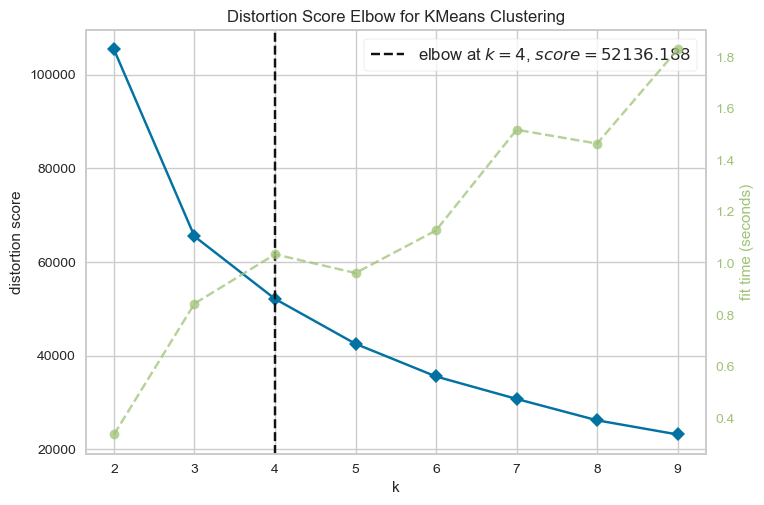

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
km = KMeans()

visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(dfk)
visualizer.show() 

<h3>RESULTS</h3>

In [14]:
cl = KMeans(n_clusters=4, random_state=0)

newdf['cluster'] = cl.fit(dfk).labels_
newdf

,cust_id,total_spend,total_av_3m,total_av_6m,total_av_12m,sku_penetrate(%),life_stage,cust_price_sensitivity,most_bsk_size,most_bsk_type,...,most_cat,most_weekday,most_coming_time,most_purchase_prod,most_prod_c10,most_prod_c20,most_prod_c30,most_prod_c40,prodcode_count,cluster
0,CUST0000804514,20.23,20.23,20.23,20.23,0.12,OT,XX,M,Small Shop,...,Fresh,6,8,PRD0900071,CL00038,DEP00010,G00007,D00002,6,2
1,CUST0000804514,20.23,20.23,20.23,20.23,0.12,OT,XX,M,Small Shop,...,Fresh,6,8,PRD0900071,CL00038,DEP00016,G00007,D00002,6,2
2,CUST0000804514,20.23,20.23,20.23,20.23,0.12,OT,XX,M,Small Shop,...,Fresh,6,8,PRD0900071,CL00038,DEP00021,G00007,D00002,6,2
3,CUST0000804514,20.23,20.23,20.23,20.23,0.12,OT,XX,M,Small Shop,...,Fresh,6,8,PRD0900071,CL00038,DEP00022,G00007,D00002,6,2
4,CUST0000804514,20.23,20.23,20.23,20.23,0.12,OT,XX,M,Small Shop,...,Fresh,6,8,PRD0900071,CL00038,DEP00024,G00007,D00002,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397854,CUST0000278162,2.00,2.00,2.00,2.00,0.04,XX,MM,S,Small Shop,...,Mixed,5,16,PRD0900674,CL00121,DEP00043,G00012,D00002,2,2
397855,CUST0000278162,2.00,2.00,2.00,2.00,0.04,XX,MM,S,Small Shop,...,Mixed,5,16,PRD0900674,CL00121,DEP00043,G00012,D00003,2,0
397856,CUST0000352552,0.63,0.63,0.63,0.63,0.02,YF,MM,S,Small Shop,...,Grocery,2,13,PRD0900833,CL00164,DEP00055,G00016,D00003,1,0
397857,CUST0000218304,1.54,1.54,1.54,1.54,0.02,OA,UM,S,Small Shop,...,Fresh,5,19,PRD0904358,CL00063,DEP00019,G00007,D00002,1,2


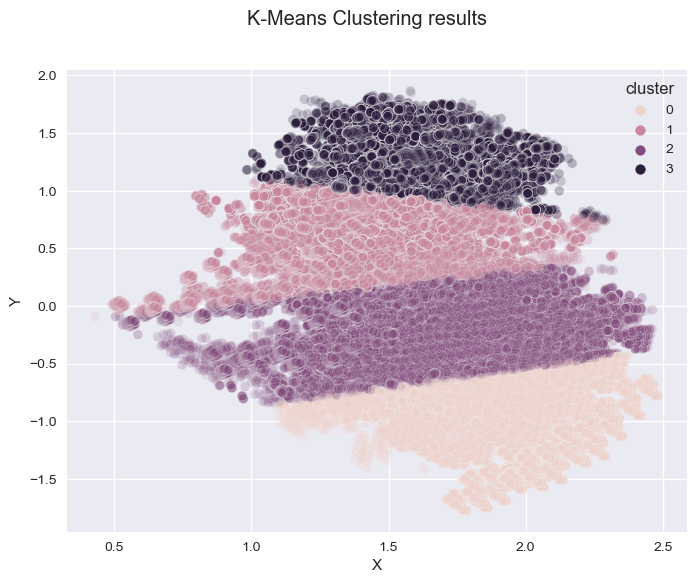

In [15]:
# Getting unique labels
 
dfk['cluster'] = newdf['cluster']
 
# plotting the results:
 
plt.style.use('seaborn')

fig, axe = plt.subplots(figsize=(8,6))

g = sns.scatterplot(data = dfk , x=0, y=1, hue="cluster", ax=axe ,alpha=0.1)
axe.set(xlabel='X', ylabel='Y')
fig.suptitle("K-Means Clustering results")
plt.show()


<h3>Misc. (miscellaneous)</h3>

In [16]:
print(newdf['cluster'].unique())

[2 0 3 1]


In [17]:
sc_newdf = pd.DataFrame(newdf.groupby('cust_id').agg(pd.Series.mode))
sc_newdf

,total_spend,total_av_3m,total_av_6m,total_av_12m,sku_penetrate(%),life_stage,cust_price_sensitivity,most_bsk_size,most_bsk_type,most_price_sensitivity,most_cat,most_weekday,most_coming_time,most_purchase_prod,most_prod_c10,most_prod_c20,most_prod_c30,most_prod_c40,prodcode_count,cluster
cust_id,,,,,,,,,,,,,,,,,,,,
CUST0000000181,2.44,2.440000,2.440000,2.440000,0.02,XX,MM,S,Small Shop,MM,Fresh,7,13,PRD0901946,CL00079,DEP00022,G00007,D00002,1,2
CUST0000000689,817.39,163.478000,272.463333,408.695000,2.35,XX,LA,L,Full Shop,LA,Mixed,2,21,PRD0900873,"[CL00150, CL00152]",DEP00052,G00015,D00003,"[44, 91]",1
CUST0000000998,7.63,7.630000,7.630000,7.630000,0.08,XX,XX,S,Small Shop,MM,"[Grocery, Nonfood]",1,"[8, 15]","[PRD0901170, PRD0903905, PRD0904460, PRD0904594]","[CL00116, CL00153, CL00155, CL00185]","[DEP00042, DEP00052, DEP00053, DEP00062]","[G00011, G00015, G00016, G00018]",D00003,4,0
CUST0000001163,66.38,16.595000,22.126667,22.126667,0.49,XX,MM,L,Top Up,MM,Fresh,"[1, 7]",16,PRD0901927,"[CL00006, CL00045, CL00078, CL00123]","[DEP00011, DEP00022]",G00004,D00002,12,3
CUST0000001194,4678.05,467.805000,779.675000,1559.350000,8.16,OT,MM,L,Full Shop,MM,Fresh,6,19,PRD0902560,CL00140,DEP00011,G00004,D00002,"[168, 179, 245]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUST0000999544,6.32,6.320000,6.320000,6.320000,0.02,PE,UM,S,Small Shop,MM,Nonfood,6,19,PRD0904602,CL00195,DEP00067,G00021,D00005,1,2
CUST0000999593,802.66,100.332500,200.665000,267.553333,4.17,YF,MM,L,Top Up,MM,Fresh,1,16,PRD0900859,CL00006,DEP00022,G00007,D00002,"[30, 76, 133]",3
CUST0000999935,862.97,123.281429,215.742500,287.656667,2.57,YF,LA,L,Full Shop,LA,Fresh,4,16,"[PRD0900986, PRD0901704]",CL00151,DEP00011,G00007,D00002,"[22, 33, 106]",3


In [19]:
newdf

,cust_id,total_spend,total_av_3m,total_av_6m,total_av_12m,sku_penetrate(%),life_stage,cust_price_sensitivity,most_bsk_size,most_bsk_type,...,most_cat,most_weekday,most_coming_time,most_purchase_prod,most_prod_c10,most_prod_c20,most_prod_c30,most_prod_c40,prodcode_count,cluster
0,CUST0000804514,20.23,20.23,20.23,20.23,0.12,OT,XX,M,Small Shop,...,Fresh,6,8,PRD0900071,CL00038,DEP00010,G00007,D00002,6,2
1,CUST0000804514,20.23,20.23,20.23,20.23,0.12,OT,XX,M,Small Shop,...,Fresh,6,8,PRD0900071,CL00038,DEP00016,G00007,D00002,6,2
2,CUST0000804514,20.23,20.23,20.23,20.23,0.12,OT,XX,M,Small Shop,...,Fresh,6,8,PRD0900071,CL00038,DEP00021,G00007,D00002,6,2
3,CUST0000804514,20.23,20.23,20.23,20.23,0.12,OT,XX,M,Small Shop,...,Fresh,6,8,PRD0900071,CL00038,DEP00022,G00007,D00002,6,2
4,CUST0000804514,20.23,20.23,20.23,20.23,0.12,OT,XX,M,Small Shop,...,Fresh,6,8,PRD0900071,CL00038,DEP00024,G00007,D00002,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397854,CUST0000278162,2.00,2.00,2.00,2.00,0.04,XX,MM,S,Small Shop,...,Mixed,5,16,PRD0900674,CL00121,DEP00043,G00012,D00002,2,2
397855,CUST0000278162,2.00,2.00,2.00,2.00,0.04,XX,MM,S,Small Shop,...,Mixed,5,16,PRD0900674,CL00121,DEP00043,G00012,D00003,2,0
397856,CUST0000352552,0.63,0.63,0.63,0.63,0.02,YF,MM,S,Small Shop,...,Grocery,2,13,PRD0900833,CL00164,DEP00055,G00016,D00003,1,0
397857,CUST0000218304,1.54,1.54,1.54,1.54,0.02,OA,UM,S,Small Shop,...,Fresh,5,19,PRD0904358,CL00063,DEP00019,G00007,D00002,1,2


In [18]:
#newdf.to_csv('custsv.csv')
#sc_newdf.to_csv('custsv_RowPerID.csv')